In [93]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [94]:
all_df = pd.read_excel("data/car.xlsx")

In [95]:
cols=['class','buying','maint','doors' ,'persons', 'lug_boot',
       'safety',]
all_df=all_df[cols]

In [96]:
all_df[:2]

,class,buying,maint,doors,persons,lug_boot,safety
0,unacc,vhigh,vhigh,2,2,small,low
1,unacc,vhigh,vhigh,2,2,small,med


In [97]:
all_df['buying']= all_df['buying'].map({'vhigh':0, 'high': 1, 'med': 2, 'low': 3}).astype(int) 
all_df['maint']= all_df['maint'].map({'vhigh':0, 'high': 1, 'med': 2, 'low': 3}).astype(int)
all_df['doors']= all_df['doors'].map({'2':0, '3': 1, '4': 2, '5more': 3}).astype(int)
all_df['persons']= all_df['persons'].map({'2':0, '4': 1, 'more': 2}).astype(int)
all_df['lug_boot']= all_df['lug_boot'].map({'small':0, 'med': 1, 'big': 2}).astype(int)
all_df['safety']= all_df['safety'].map({'low':0, 'med': 1, 'high': 2}).astype(int)
all_df['class']= all_df['class'].map({'unacc':0, 'acc': 1, 'good': 2, 'vgood': 3}).astype(int)

In [98]:
all_df[:4]

,class,buying,maint,doors,persons,lug_boot,safety
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,2
3,0,0,0,0,0,1,0


In [99]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1728 train: 1373 test: 355


In [100]:
trainray= train_df.values
train_Features = trainray[:,1:]
train_Label = trainray[:,0]
    
testray= test_df.values
test_Features = testray[:,1:]
test_Label = testray[:,0]

In [101]:
train_Features[:4]

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 2],
       [0, 0, 0, 0, 1, 0]])

In [102]:
train_Label[:4]

array([0, 0, 0, 0])

In [103]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [104]:
model = Sequential()

In [105]:
model.add(Dense(units=40, input_dim=6, 
                kernel_initializer='uniform', 
                activation='relu'))

In [106]:
model.add(Dense(units=4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [107]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [108]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 40)                280       
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 164       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 5         
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [109]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [110]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=150,verbose=2)

Train on 1235 samples, validate on 138 samples
Epoch 1/30
 - 0s - loss: 0.6925 - acc: 0.6810 - val_loss: 0.6977 - val_acc: 0.5725
Epoch 2/30
 - 0s - loss: 0.6906 - acc: 0.7206 - val_loss: 0.7027 - val_acc: 0.5725
Epoch 3/30
 - 0s - loss: 0.6885 - acc: 0.7206 - val_loss: 0.7077 - val_acc: 0.5725
Epoch 4/30
 - 0s - loss: 0.6858 - acc: 0.7206 - val_loss: 0.7147 - val_acc: 0.5725
Epoch 5/30
 - 0s - loss: 0.6826 - acc: 0.7206 - val_loss: 0.7242 - val_acc: 0.5725
Epoch 6/30
 - 0s - loss: 0.6780 - acc: 0.7206 - val_loss: 0.7334 - val_acc: 0.5725
Epoch 7/30
 - 0s - loss: 0.6711 - acc: 0.7206 - val_loss: 0.7426 - val_acc: 0.5725
Epoch 8/30
 - 0s - loss: 0.6621 - acc: 0.7206 - val_loss: 0.7532 - val_acc: 0.5725
Epoch 9/30
 - 0s - loss: 0.6503 - acc: 0.7206 - val_loss: 0.7622 - val_acc: 0.5725
Epoch 10/30
 - 0s - loss: 0.6368 - acc: 0.7206 - val_loss: 0.7545 - val_acc: 0.5725
Epoch 11/30
 - 0s - loss: 0.6202 - acc: 0.7206 - val_loss: 0.7066 - val_acc: 0.5652
Epoch 12/30
 - 0s - loss: 0.6024 - acc

In [111]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

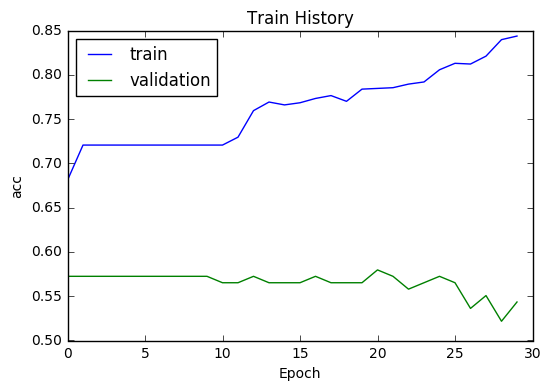

In [112]:
show_train_history(train_history,'acc','val_acc')

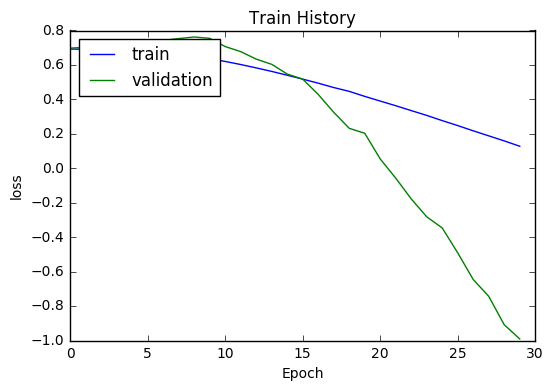

In [113]:
show_train_history(train_history,'loss','val_loss')

In [114]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

355/355 [==============================] - 0s 79us/step


In [115]:
scores[1]

0.8140845071262037